<a href="https://colab.research.google.com/github/TurinShayla/Deep-Learning/blob/main/CodingRNNPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
len(training_set)

1258

### Creating a data structure with 60 timesteps and 1 output
60 timespace means, the network will look at previous 60 data on that particular time **(T)**, and will try to correlate and then will try to predict next output at **T+1** based on this understanding.

In [ ]:
X_train = [] #list
y_train = []
for i in range(60, 1258): #as time steps 60, so start the loop from 60, length of dataset
    X_train.append(training_set_scaled[i-60:i, 0]) #store the previous 60 stock price
    y_train.append(training_set_scaled[i, 0]) #the nect output at T+1
X_train, y_train = np.array(X_train), np.array(y_train) #convert to numpy array (mandatory)

In [ ]:
print(len(X_train)) # dataset except first 60

1198


### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #batch size, timesteps, indicators
#X_train.shape[0]=number of row or line [1]= column, 1= one indicator

In [ ]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN
The **sequential class** will allow us to create a neural network object representing a sequence of layers.

The **dense class** to add the output layer.

The **LSTM class**, to add the LSTM layers.

And, the **dropout class** to add some dropout regularization.

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation
drop out to avoid overfitting

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 118ms/step - loss: 0.0288
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0042
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0039
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#########################################################################
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

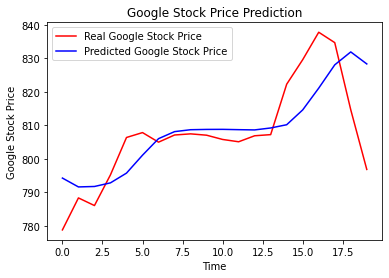

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()